In [19]:
#1
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('ReceiptSwiss.jpg')
img2 = cv2.imread('top-secret.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

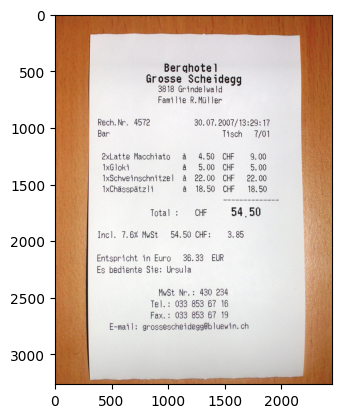

In [20]:
plt.imshow(img1)

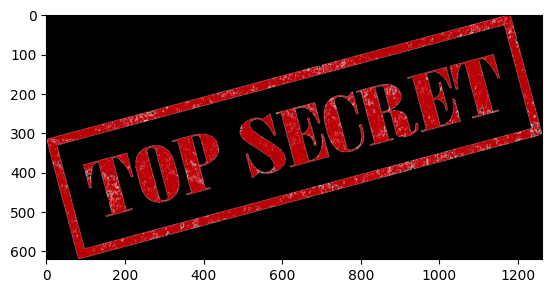

In [21]:
plt.imshow(img2)

In [27]:
img2.shape

(621, 1262, 3)

In [22]:
img1.shape

(3264, 2448, 3)

In [51]:
x1 = 750
y1 = 1500

x2 = x1+img2.shape[1]
y2 = y1+img2.shape[0]

In [ ]:
roi.shape

(600, 600, 3)

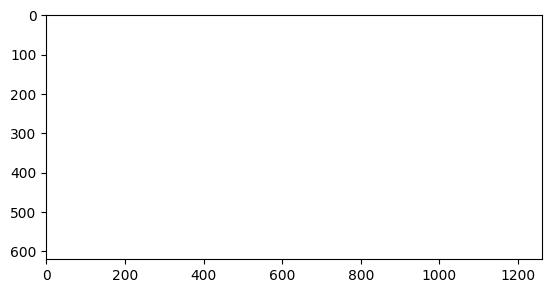

In [64]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)
white_background.shape
plt.imshow(white_background)

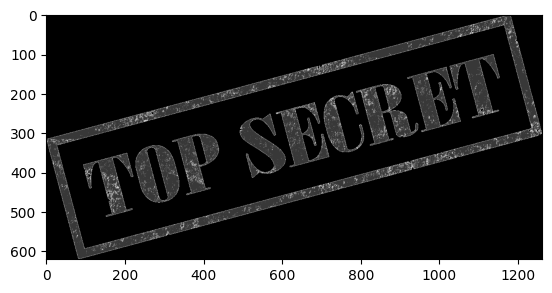

In [65]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap = 'gray')

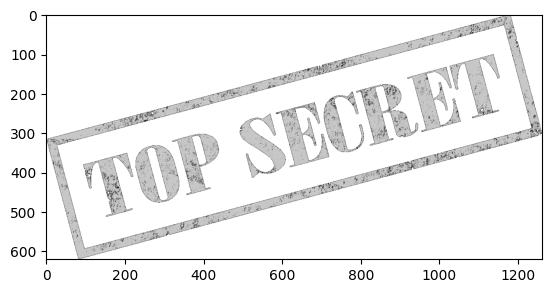

In [66]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap = 'gray')

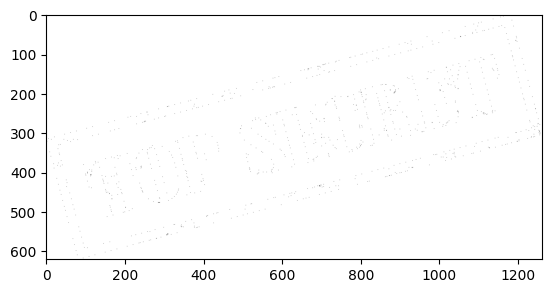

In [68]:
mask_3c = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
plt.imshow(mask_3c)

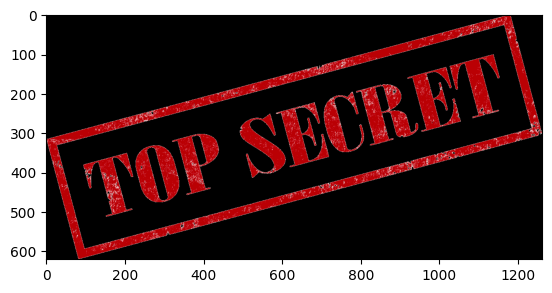

In [69]:
watermark = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(watermark)

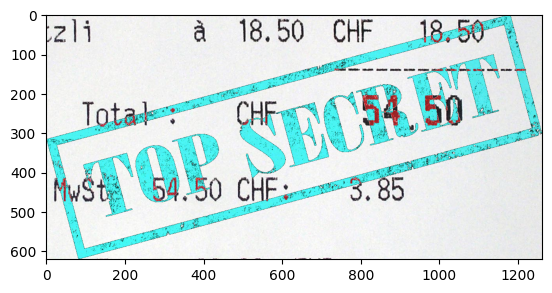

In [74]:
#disini saya menggunakan xor untuk lebih memblending watermark, dan agar lebih seperti stampel
final = cv2.bitwise_xor(roi,watermark)
plt.imshow(final)

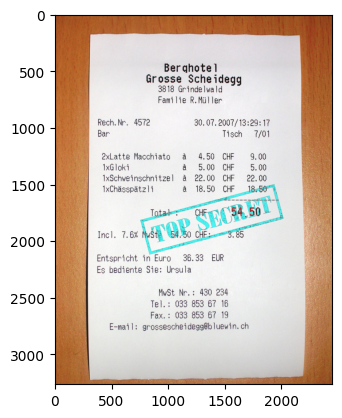

In [77]:
large_img =img1
small_img = final

large_img[y1:y2 , x1:x2] = small_img

plt.imshow(large_img)

In [53]:
import numpy as np

In [2]:
import cv2
#membuat fungsi untuk klik mouse
def draw_rectangle(event,x,y,flags,param):
    global pt1,pt2,topLeft_clicked,botRight_clicked

    # mouse di click
    if event == cv2.EVENT_LBUTTONDOWN:

        if topLeft_clicked == True and botRight_clicked == True:
            topLeft_clicked = False
            botRight_clicked = False
            pt1 = (0,0)
            pt2 = (0,0)

        if topLeft_clicked == False:
            pt1 = (x,y)
            topLeft_clicked = True
            
        elif botRight_clicked == False:
            pt2 = (x,y)
            botRight_clicked = True

pt1 = (0,0)
pt2 = (0,0)
topLeft_clicked = False
botRight_clicked = False

cap = cv2.VideoCapture(0)

# membuat window untuk display video
cv2.namedWindow('Test')

# menyambungkan klik dengan gambar
cv2.setMouseCallback('Test', draw_rectangle)


while True:
    # tangkap frame ke frame
    ret, frame = cap.read()

    if topLeft_clicked:
        cv2.circle(frame, center=pt1, radius=5, color=(0,0,255), thickness=-1)

    # membuat persegi panjang
    if topLeft_clicked and botRight_clicked:
        cv2.rectangle(frame, pt1, pt2, (0, 0, 255), 2)


    # display frame
    cv2.imshow('Test', frame)

    #keluar jika memencep q
    #tidak akan keluar jika memencet x di pojok. hal ini karena video berupa gambar yang di open dan close secara cepat
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# selesai
cap.release()
cv2.destroyAllWindows()